In [19]:
import numpy as np
from filterpy.stats import gaussian, multivariate_gaussian
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

from lib.kf_book.gaussian_internal import plot_correlated_data
import lib.kf_book.mkf_internal as mkf_internal
from filterpy.stats import plot_covariance_ellipse

Covriance Matrix

In [3]:
W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W), np.cov(H, W, bias=1) ## unbiased estimator: partially sampling & sampling include all the population

(array([[2.50000e-02, 2.72750e+00],
        [2.72750e+00, 3.27235e+02]]),
 array([[2.00000e-02, 2.18200e+00],
        [2.18200e+00, 2.61788e+02]]))

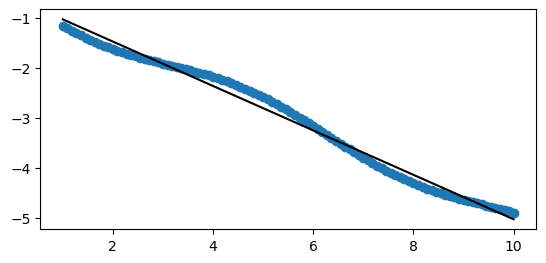

[[ 6.95592287 -3.08427   ]
 [-3.08427     1.38681544]]


In [5]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

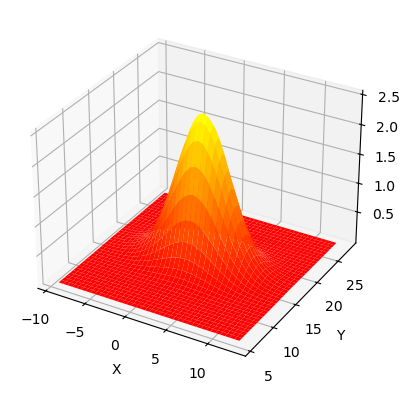

In [10]:
mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)

In [12]:
mu = [2.0, 7.0]
P = [[8., 0.], 
     [0., 3.]] # Covariance matrix P
x = [2.5, 7.3]

Probability density : filterpy & scipy

In [13]:
%precision 4
multivariate_gaussian(x, mu, P)

0.0315

In [14]:
print(f'{multivariate_normal(mu, P).pdf(x):.4f}')

0.0315


In [20]:
from ipywidgets import interact
from lib.kf_book.book_plots import figsize, FloatSlider

fig = None
def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig: plt.close(fig)
    fig = plt.figure(figsize=(4,4))
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]

    plot_covariance_ellipse((10, 10), P1, axis_equal=False,
                            show_semiaxis=True)

    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)

    
with figsize(y=6):
    interact (plot_covariance,           
          var_x=FloatSlider(5, min=0, max=20), 
          var_y=FloatSlider(5, min=0, max=20), 
          cov_xy=FloatSlider(1.5, min=0, max=50, step=.2))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='var_x', max=20.0), FloatSli…